# Querying Scalar Quantities

Models compute globally averaged quantities that are stored in `ocean_scalars.nc` files. This notebook shows how we do data discovery on scalar quantities and plot them as time series.

**Requirements:** The `conda/analysis3-20.01` (or later) module on the VDI (or your own up-to-date cookbook installation).

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import pandas as pd
import matplotlib.pyplot as plt
from dask.distributed import Client

It's often a good idea to start a cluster with multiple cores for you to work with. 

In [2]:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:41037 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 48 Memory: 202.49 GB


Connect to the default database:

In [3]:
session = cc.database.create_session()

An **experiment** is a particular model run with a given forcing.  It composed of several independed runs of the mode code.

Here is a list experiments that are based on the 0.25 degree and are based on the JRA55v13 forcing with at least 2000 NetCDF files. 

In [4]:
df = cc.querying.get_experiments(session)
df[df['experiment'].str.contains("025deg_jra55v13") & (df.ncfiles > 2000)]

,experiment,ncfiles
29,025deg_jra55v13_ryf9091_gmredi6,4111
31,025deg_jra55v13_iaf_gmredi6,4727
32,025deg_jra55v13_ryf8485_gmredi6,4980
35,025deg_jra55v13_ryf8485_spinup_A,4221
40,025deg_jra55v13_iaf_nogmredi6,4691
44,025deg_jra55v13_ryf8485_KDS75,4396


An experiment is composed of many different **variables** which are stored at different **frequencies**.

The function `cc.querying.get_frequencies` gives a list of the frequencies are available for a particular experiment.

In [5]:
cc.querying.get_frequencies(session, "025deg_jra55v13_iaf_gmredi6")

,frequency
0,None
1,1 daily
2,1 monthly
3,1 yearly
4,static


Here are all of the variables that are stored at the frequency of `1 monthly` and also are files of the form `ocean/ocean_scalar.nc`.

In [6]:
pd.set_option("display.max_rows", 200) # to ensure all rows of the pandas DataFrame are displayed
df = cc.querying.get_variables(session, "025deg_jra55v13_iaf_gmredi6", 
                               frequency = "1 monthly")
df[df.ncfile.str.contains("ocean_scalar.nc")]

,name,frequency,ncfile,# ncfiles,time_start,time_end
20,average_DT,1 monthly,output153/ocean/ocean_scalar.nc,308,1957-12-30 00:00:00,2257-12-30 00:00:00
21,average_T1,1 monthly,output153/ocean/ocean_scalar.nc,308,1957-12-30 00:00:00,2257-12-30 00:00:00
22,average_T2,1 monthly,output153/ocean/ocean_scalar.nc,308,1957-12-30 00:00:00,2257-12-30 00:00:00
36,eta_global,1 monthly,output153/ocean/ocean_scalar.nc,154,1957-12-30 00:00:00,2257-12-30 00:00:00
63,ke_tot,1 monthly,output153/ocean/ocean_scalar.nc,154,1957-12-30 00:00:00,2257-12-30 00:00:00
74,nv,1 monthly,output153/ocean/ocean_scalar.nc,308,1957-12-30 00:00:00,2257-12-30 00:00:00
76,pe_tot,1 monthly,output153/ocean/ocean_scalar.nc,154,1957-12-30 00:00:00,2257-12-30 00:00:00
80,rhoave,1 monthly,output153/ocean/ocean_scalar.nc,154,1957-12-30 00:00:00,2257-12-30 00:00:00
84,salt_global_ave,1 monthly,output153/ocean/ocean_scalar.nc,154,1957-12-30 00:00:00,2257-12-30 00:00:00
85,salt_surface_ave,1 monthly,output153/ocean/ocean_scalar.nc,154,1957-12-30 00:00:00,2257-12-30 00:00:00


Say, we want to look at one of these variables such as "total_ocean_salt".  We use `cc.querying.getvar()` for this.

In [7]:
experiment = "025deg_jra55v13_iaf_gmredi6"
variable = "total_ocean_salt"
da = cc.querying.getvar(experiment, variable, session)
da

,Array,Chunk
Bytes,14.40 kB,4 B
Shape,"(3600, 1)","(1, 1)"
Count,7354 Tasks,3600 Chunks
Type,float32,numpy.ndarray


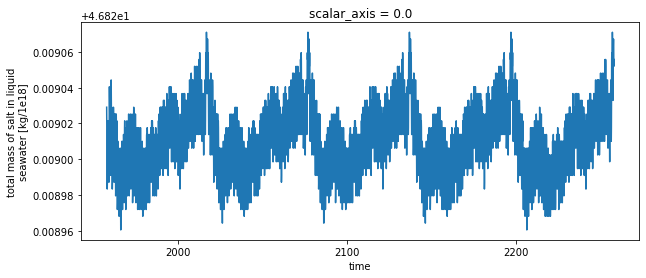

In [8]:
da.plot(figsize=(10,4))

Suppose we want to compare this variable across several different experiments. Using our list of experiments from above, we call put that into a Python list.

In [9]:
df = cc.querying.get_experiments(session)
experiments = list(df[df['experiment'].str.contains("025deg_jra55v13") & \
   (df.ncfiles > 2000)].experiment)
experiments

['025deg_jra55v13_ryf9091_gmredi6',
 '025deg_jra55v13_iaf_gmredi6',
 '025deg_jra55v13_ryf8485_gmredi6',
 '025deg_jra55v13_ryf8485_spinup_A',
 '025deg_jra55v13_iaf_nogmredi6',
 '025deg_jra55v13_ryf8485_KDS75']

And for each experiment, extract out the variable of interest and store the result in a dictionary using the experiment as the key. Notice we are computing the variables and storing the results for later visualization.

In [10]:
results = dict()
for experiment in experiments:
    variable = "total_ocean_salt"
    results[experiment] = cc.querying.getvar(experiment, variable, session).compute()

Now, plot the results

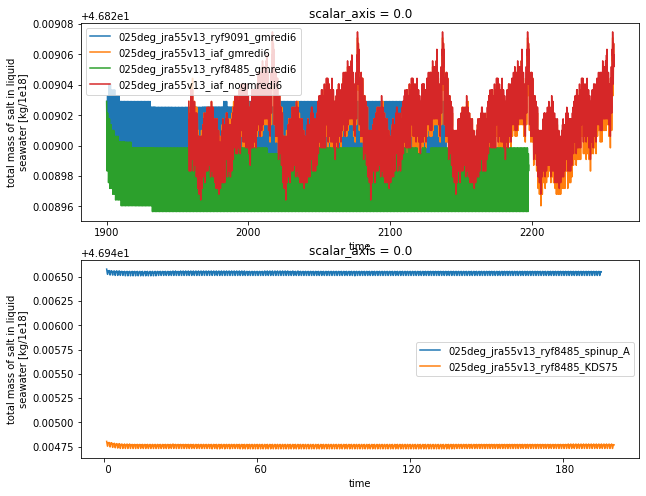

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
for experiment in experiments:
    da = results[experiment]
    if da.time.values[0].year > 1000:
        ax=axs[0]
    else:
        ax=axs[1]
    da.plot(label=experiment, ax=ax)

axs[0].legend()
axs[1].legend();